In [81]:
from datasets import load_dataset
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

In [4]:
%%capture
ds = load_dataset("riotu-lab/Synthetic-UAV-Flight-Trajectories")

In [11]:
drone_df = ds['train'].to_pandas()  # Assuming you want to convert the 'train' split. Replace 'train' with the appropriate split if necessary.
display(drone_df)  # Show the first few rows

,timestamp,tx,ty,tz
0,1.700250e+09,-20.110498,2.792424,17.071516
1,1.700250e+09,-20.027747,2.781007,17.104970
2,1.700250e+09,-19.958962,2.779229,17.148497
3,1.700250e+09,-19.898282,2.804703,17.221119
4,1.700250e+09,-19.857856,2.868688,17.274563
...,...,...,...,...
766135,1.699986e+09,-31.410724,-2.445097,5.099618
766136,1.699986e+09,-31.692487,-2.685899,5.088108
766137,1.699986e+09,-31.965783,-2.901507,5.081302
766138,1.699986e+09,-32.269788,-3.124112,5.080849


In [15]:
drone_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 766140 entries, 0 to 766139
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   timestamp  766140 non-null  float64
 1   tx         766140 non-null  float64
 2   ty         766140 non-null  float64
 3   tz         766140 non-null  float64
dtypes: float64(4)
memory usage: 23.4 MB


In [16]:
drone_df.describe()

,timestamp,tx,ty,tz
count,7.661400e+05,766140.000000,766140.000000,766140.000000
mean,1.700199e+09,0.444222,0.566890,11.950888
std,8.888758e+04,22.990268,22.913703,4.438364
min,1.699984e+09,-44.617831,-44.709706,4.849818
25%,1.700194e+09,-19.021593,-18.693344,8.134214
50%,1.700221e+09,0.654848,0.519371,11.496458
75%,1.700265e+09,20.452075,20.378289,15.669407
max,1.700290e+09,45.219877,44.578205,24.662495


In [17]:
drone_df.isnull().sum()

timestamp    0
tx           0
ty           0
tz           0
dtype: int64

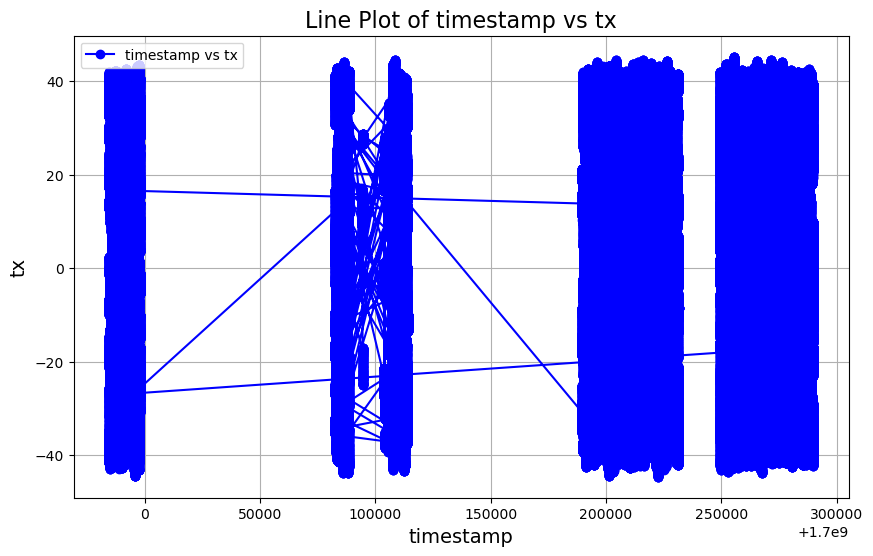

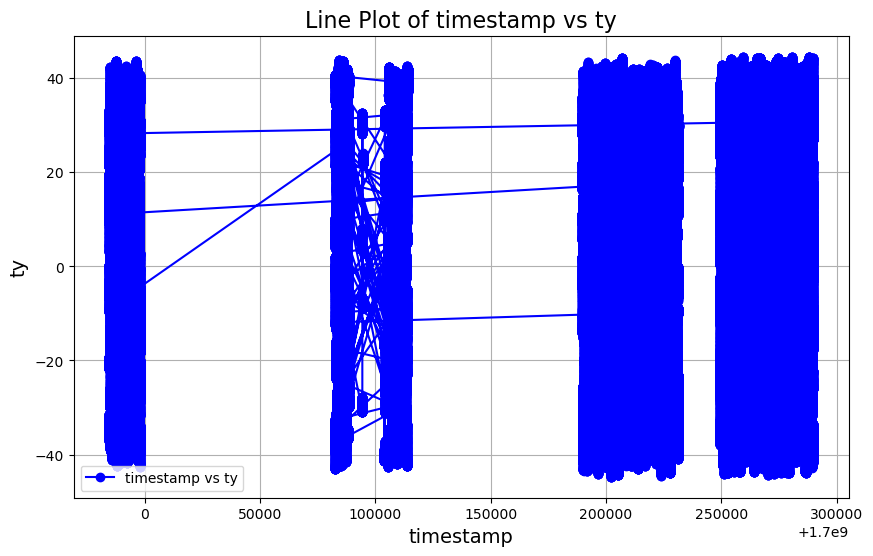

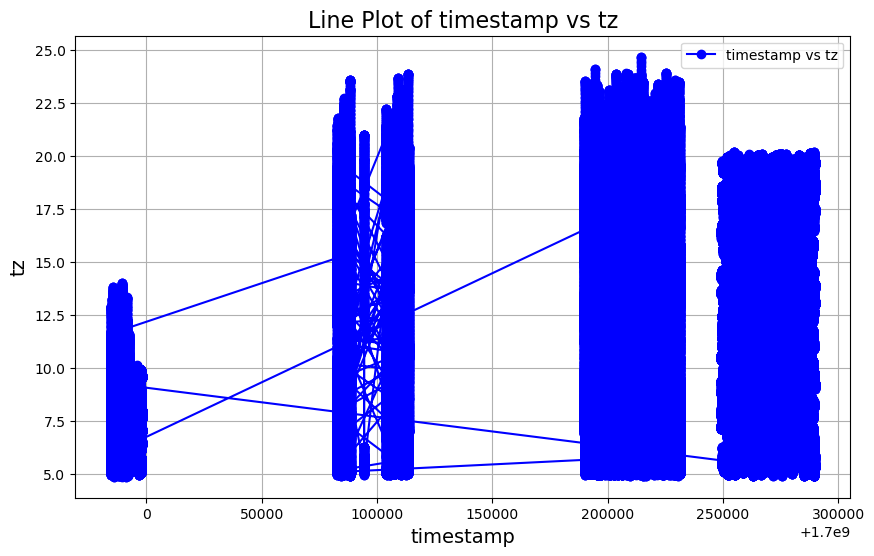

In [22]:
def plot_line(df, col_a, col_b):
    plt.figure(figsize=(10, 6))
    plt.plot(df[col_a], df[col_b], marker='o', linestyle='-', color='b', label=f'{col_a} vs {col_b}')
    
    plt.title(f'Line Plot of {col_a} vs {col_b}', fontsize=16)
    plt.xlabel(col_a, fontsize=14)
    plt.ylabel(col_b, fontsize=14)

    plt.grid(True)
    plt.legend()
    plt.show()

# Call the function with your DataFrame and column names
plot_line(drone_df, 'timestamp', 'tx')
plot_line(drone_df, 'timestamp', 'ty')
plot_line(drone_df, 'timestamp', 'tz')


## Single Trajectory

In [88]:
traj_name = 'gazebo_trajectory2D-2_100.csv'
df_single = pd.read_csv(f'../dataset/{traj_name}', dtype={'timestamp': 'float64', 'tx': 'float64', 'ty': 'float64', 'tz': 'float64'})
display(df_single)

,timestamp,tx,ty,tz
0,1.700250e+09,-20.110498,2.792424,17.071516
1,1.700250e+09,-20.027747,2.781007,17.104970
2,1.700250e+09,-19.958962,2.779229,17.148497
3,1.700250e+09,-19.898282,2.804703,17.221119
4,1.700250e+09,-19.857856,2.868688,17.274563
...,...,...,...,...
106,1.700250e+09,-20.257326,2.629376,17.441737
107,1.700250e+09,-20.080653,2.582614,17.441485
108,1.700250e+09,-19.886808,2.547659,17.440770
109,1.700250e+09,-19.708913,2.527880,17.443150


In [89]:
df_single['timestamp'] = df_single['timestamp'] - df_single['timestamp'].iloc[0]
df_single['timestamp'] = df_single['timestamp'].astype('float32')
display(df_single)

,timestamp,tx,ty,tz
0,0.000000,-20.110498,2.792424,17.071516
1,0.100000,-20.027747,2.781007,17.104970
2,0.200000,-19.958962,2.779229,17.148497
3,0.300000,-19.898282,2.804703,17.221119
4,0.400000,-19.857856,2.868688,17.274563
...,...,...,...,...
106,10.599990,-20.257326,2.629376,17.441737
107,10.699989,-20.080653,2.582614,17.441485
108,10.799990,-19.886808,2.547659,17.440770
109,10.899990,-19.708913,2.527880,17.443150


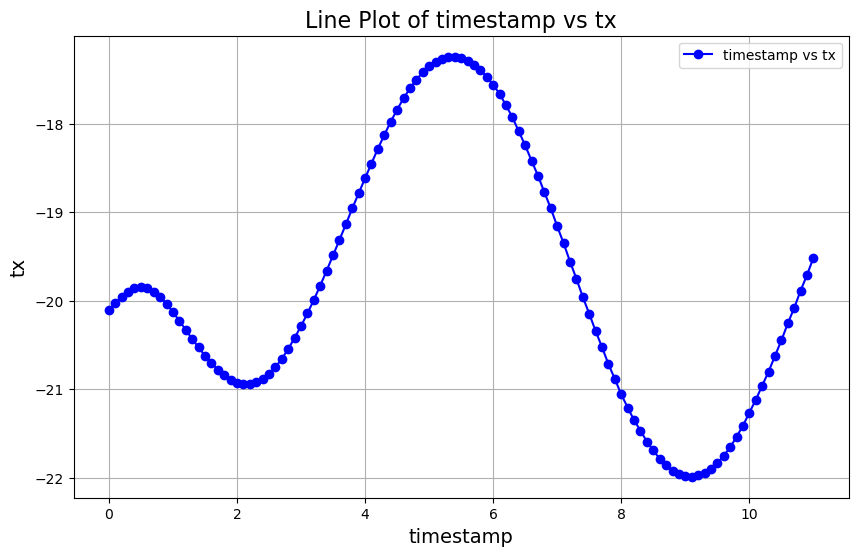

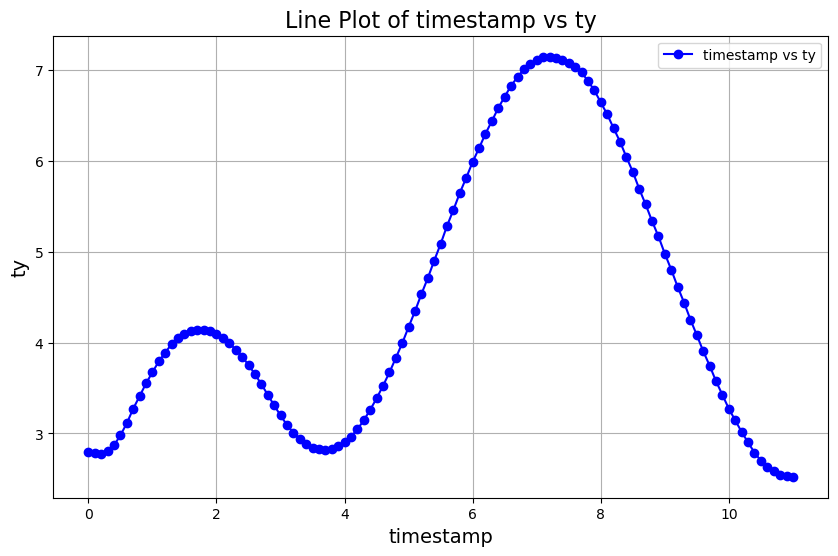

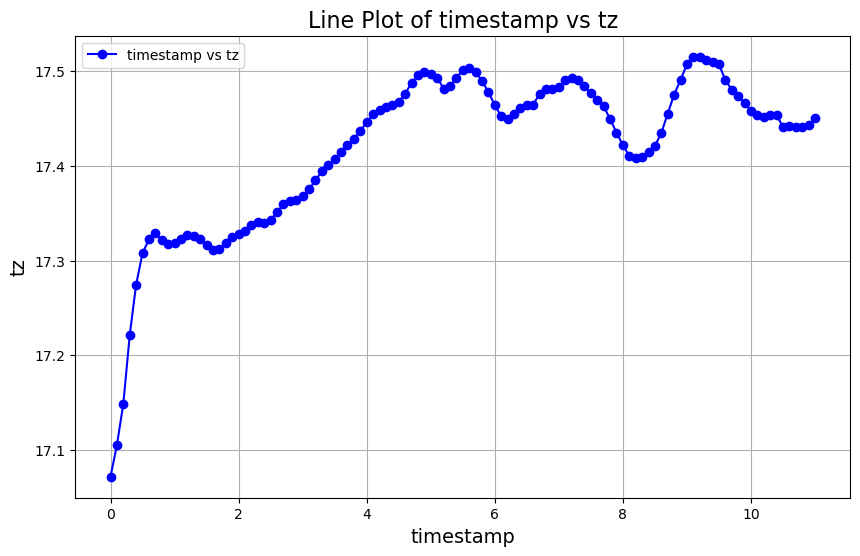

In [90]:
# Call the function with your DataFrame and column names
plot_line(df_single, 'timestamp', 'tx')
plot_line(df_single, 'timestamp', 'ty')
plot_line(df_single, 'timestamp', 'tz')

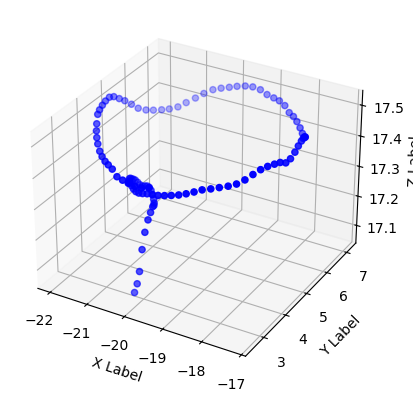

In [91]:
# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the points
ax.scatter(df_single['tx'], df_single['ty'], df_single['tz'], color='b', marker='o')

# Add labels
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

# Show the plot
plt.show()

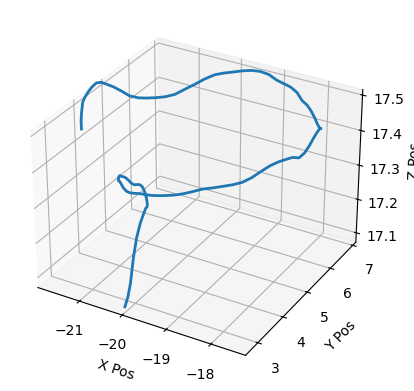

In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from mpl_toolkits.mplot3d import Axes3D


# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Initialize the line
line, = ax.plot([], [], [], lw=2)

# Set the limits
ax.set_xlim(df_single['tx'].min(), df_single['tx'].max())
ax.set_ylim(df_single['ty'].min(), df_single['ty'].max())
ax.set_zlim(df_single['tz'].min(), df_single['tz'].max())

ax.set_xlabel('X Pos')
ax.set_ylabel('Y Pos')
ax.set_zlabel('Z Pos')

# Initialize the plot
def init():
    line.set_data([], [])
    line.set_3d_properties([])
    return line,

# Update function for animation
def update(frame):
    line.set_data(df_single['tx'][:frame], df_single['ty'][:frame])
    line.set_3d_properties(df_single['tz'][:frame])
    return line,

# Create the animation
ani = FuncAnimation(fig, update, frames=len(df), init_func=init, blit=True, interval=100)
ani.save(f'../dataset/GIFS/{traj_name}_animation.gif', writer='pillow', fps=30)

# Show the plot
plt.show()

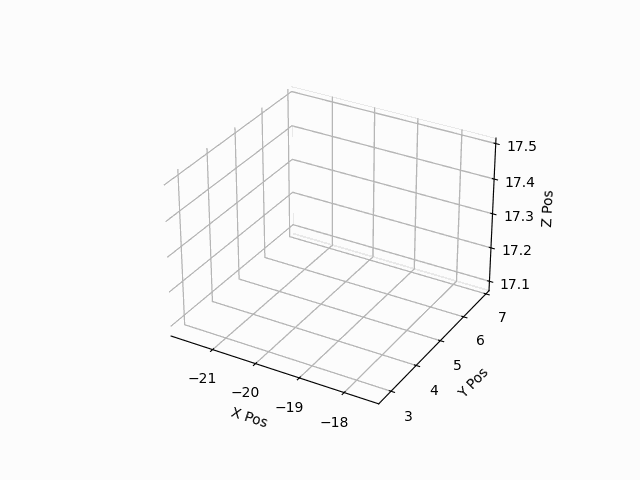

In [105]:
from IPython.display import Image, display

# Specify the path to your GIF
gif_path = '../dataset/GIFS/gazebo_trajectory2D-2_100.csv_animation.gif'  # Replace with your GIF file path

# Display the GIF
display(Image(filename=gif_path))